In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [36]:
results_path = '../../model_results/yolo_augmented_exp'
dfs = {}
for folder in os.listdir(results_path):
    dfs[folder] = pd.read_csv(f'{results_path}/{folder}/results.csv').rename(columns={"Unnamed: 0":"name"})
    dfs[folder]["F1"] = 2 * ((dfs[folder]["p"] * dfs[folder]["r"]) / (dfs[folder]["p"] + dfs[folder]["r"]))
    dfs[folder]["experiment"] = folder.strip()
    dfs[folder].fillna(0)
print(dfs)

{'-175_brightness':                                                  name  images  labels  \
0                                                 all   120.0   180.0   
1                  Geschwindigkeitsbegrenzung 20 km/h   120.0     2.0   
2                  Geschwindigkeitsbegrenzung 30 km/h   120.0     6.0   
3                  Geschwindigkeitsbegrenzung 50 km/h   120.0    12.0   
4                  Geschwindigkeitsbegrenzung 60 km/h   120.0     6.0   
5                  Geschwindigkeitsbegrenzung 70 km/h   120.0     6.0   
6                  Geschwindigkeitsbegrenzung 80 km/h   120.0     7.0   
7               Geschwindigkeitsbegrenzung aufgehoben   120.0     4.0   
8                 Geschwindigkeitsbegrenzung 100 km/h   120.0    13.0   
9                 Geschwindigkeitsbegrenzung 120 km/h   120.0    17.0   
10                                      Überholverbot   120.0     4.0   
11                              Überholverbot für LKW   120.0    16.0   
12                             

In [13]:
test = {"A": ["-175_blur", "0.9_salt_pepper", "gaussian_noise", "block"],}
test_df = pd.DataFrame(test)
test_df["A"].str.extract('(-?\d+([.]\d+)?)', expand=False)[0]

0    -175
1     0.9
2     NaN
3     NaN
Name: 0, dtype: object

In [41]:
exps = {
    "brightness": [],
    "salt_pepper": [],
    "gaussian": [],
    "blur": [],
    "unaugmented": [],
    "block": [],
    "avg": []
}
for key, df in dfs.items():
    for key_exps in exps.keys():
        if key_exps in key:
            df_row = df.iloc[0].copy()
            exps[key_exps].append(df_row)

for key, exp in exps.items():
    if key == "avg": continue
    df = pd.DataFrame(exp)
    # extract numbers with a regex and take only the first extraction
    df['sort'] = df['experiment'].str.extract('(-?\d+([.]\d+)?)', expand=False)[0].astype(float)
    df.columns = df.columns.str.strip()
    df['experiment'] = df['experiment'].str.strip()
    df.sort_values(by='sort', inplace=True)
    df = df.drop('sort', axis=1)
    df.reset_index(drop=True, inplace=True)
    exps[key] = df 

print(exps)

{'brightness':    name  images  labels         p         r     map50       map        F1  \
0   all   120.0   180.0  0.053268  0.175012  0.084208  0.059701  0.081676   
1   all   120.0   180.0  0.287150  0.151267  0.106602  0.073728  0.198151   
2   all   120.0   180.0  0.719822  0.145277  0.162281  0.121063  0.241761   
3   all   120.0   180.0  0.742612  0.151813  0.192640  0.140582  0.252090   
4   all   120.0   180.0  0.496199  0.318033  0.334719  0.253903  0.387623   
5   all   120.0   180.0  0.736440  0.393006  0.461095  0.368345  0.512509   
6   all   120.0   180.0  0.795271  0.615591  0.709389  0.560327  0.693990   
7   all   120.0   180.0  0.801383  0.867839  0.909410  0.746080  0.833288   
8   all   120.0   180.0  0.934976  0.895473  0.955276  0.807986  0.914799   
9   all   120.0   180.0  0.915938  0.868049  0.943881  0.802516  0.891351   
10  all   120.0   180.0  0.836239  0.813805  0.919587  0.781942  0.824870   
11  all   120.0   180.0  0.899831  0.715201  0.870401  0.7340

/tmp/ipykernel_2805/3656169627.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


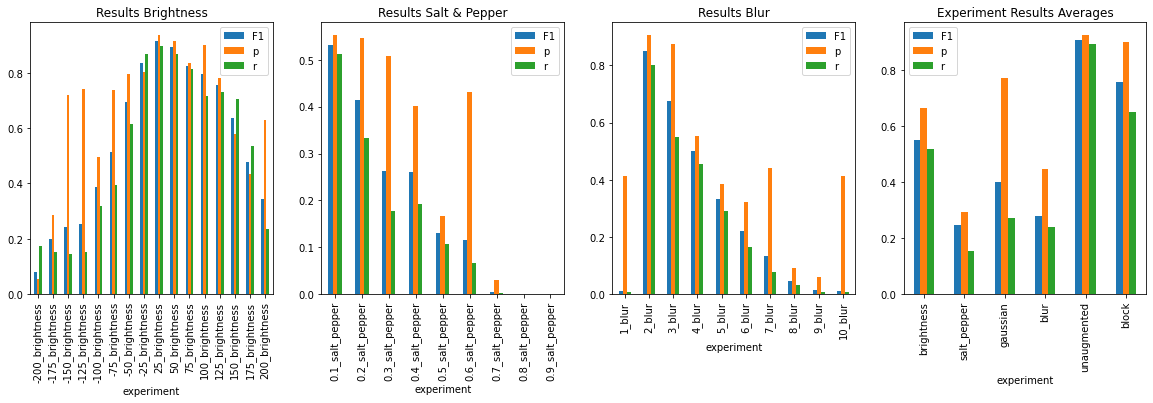

In [64]:
avg = {
    "experiment": [],
    "p": [],
    "r": [],
    "F1": []
}
for key in exps.keys():
    if key == "avg": continue
    avg["experiment"].append(key)
    avg["p"].append(exps[key]["p"].mean())
    avg["r"].append(exps[key]["r"].mean())
    avg["F1"].append(exps[key]["F1"].mean())
avg_df = pd.DataFrame(avg)
exps["avg"] = avg_df

fig, axs = plt.subplots(1,4, figsize=(20,5))
keys = ["brightness", "salt_pepper", "blur", "avg"]
for i, key in enumerate(keys):
    df = exps[key]
    df.plot.bar(x="experiment" ,y=["F1", "p", "r"], ax=axs[i])

axs[0].set_title("Results Brightness")
axs[1].set_title("Results Salt & Pepper")
axs[2].set_title("Results Blur")
axs[3].set_title("Experiment Results Averages")

fig.savefig("yolo_exps_results.pdf", bbox_inches="tight")
fig.show()
